In [1]:
import pandas as pd 
df=pd.read_csv("C:/Users/HP/Downloads/drugs_side_effects_drugs_com.csv/drugs_side_effects_drugs_com.csv")

In [3]:
df.head(1)

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html


In [4]:
df['side_effects'][0]

'(hives, difficult breathing, swelling in your face or throat) or a severe skin reaction (fever, sore throat, burning in your eyes, skin pain, red or purple skin rash that spreads and causes blistering and peeling). Seek medical treatment if you have a serious drug reaction that can affect many parts of your body. Symptoms may include: skin rash, fever, swollen glands, flu-like symptoms, muscle aches, severe weakness, unusual bruising, or yellowing of your skin or eyes. This reaction may occur several weeks after you began using doxycycline. Doxycycline may cause serious side effects. Call your doctor at once if you have: severe stomach pain, diarrhea that is watery or bloody; throat irritation, trouble swallowing; chest pain, irregular heart rhythm, feeling short of breath; little or no urination; low white blood cell counts - fever, chills, swollen glands, body aches, weakness, pale skin, easy bruising or bleeding; severe headaches, ringing in your ears, dizziness, nausea, vision pro

In [14]:
import numpy as np 

In [22]:
df['rating']=pd.to_numeric(df['rating'],errors='coerce')

In [ ]:
df['rating']=df['rating'].fillna(0)

In [28]:
df['rating']=df['rating'].replace(0,np.mean(df['rating']))

In [29]:
df['rating'].unique()

array([ 6.8       ,  7.2       ,  5.7       ,  7.9       ,  7.4       ,
        7.6       ,  7.7       ,  8.        ,  8.5       ,  7.8       ,
        6.        ,  7.3       ,  6.3       ,  8.4       ,  7.5       ,
       10.        ,  6.9       ,  8.3       ,  9.        ,  8.2       ,
        5.        ,  8.8       ,  3.68655749,  6.7       ,  7.        ,
        6.4       ,  6.6       ,  8.7       ,  8.6       ,  8.1       ,
        4.8       ,  5.4       ,  9.5       ,  5.2       ,  2.        ,
        3.8       ,  7.1       ,  8.9       ,  2.6       ,  4.4       ,
        6.5       ,  3.7       ,  6.1       ,  9.4       ,  5.8       ,
        5.1       ,  5.5       ,  4.5       ,  9.1       ,  1.        ,
        5.9       ,  4.        ,  9.3       ,  4.7       ,  4.6       ,
        4.9       ,  3.3       ,  3.9       ,  9.7       ,  6.2       ,
        2.1       ,  9.8       ,  5.3       ,  5.6       ,  2.5       ,
        4.2       ,  3.6       ,  4.3       ,  3.        ,  9.2 

In [44]:
df['alcohol']=df['alcohol'].fillna('O')
df['alcohol'].unique()

array(['X', 'O'], dtype=object)

In [52]:
df['pregnancy_category']=df['pregnancy_category'].fillna('Unkown')

In [60]:
df['side_effects'][1]

'hives ; difficulty breathing; swelling of your face, lips, tongue, or throat. Call your doctor at once if you have: a light-headed feeling, like you might pass out; little or no urination; high potassium level - nausea , weakness, tingly feeling, chest pain, irregular heartbeats, loss of movement; o signs of other electrolyte imbalances - increased thirst or urination, confusion, vomiting , muscle pain, slurred speech, severe weakness, numbness , loss of coordination, feeling unsteady. Common spironolactone side effects may include: breast swelling or tenderness.'

In [1]:
import pandas as pd 
df=pd.read_csv("D:/Work/Projects/drug_recommender/data.csv")

In [10]:
model_data=df[['drug_name','side_effects']]
model_data.head()

,drug_name,side_effects
0,doxycycline,"(hives, difficult breathing, swelling in your ..."
1,spironolactone,hives ; difficulty breathing; swelling of your...
2,minocycline,"skin rash, fever, swollen glands, flu-like sym..."
3,Accutane,problems with your vision or hearing; muscle o...
4,clindamycin,hives ; difficult breathing; swelling of your ...


In [19]:
stopwords=['Call your doctor at once if you have',

'Tell your doctor if you have',

'Check with your doctor immediately if',

'Seek medical attention right away if',

'Stop using [drug name] and call your doctor if you have']

swords=[]
for i in stopwords:
    w=i.split()
    for j in range(len(w)):
        swords.append(w[j])

set(swords)

{'Call',
 'Check',
 'Seek',
 'Stop',
 'Tell',
 '[drug',
 'and',
 'at',
 'attention',
 'away',
 'call',
 'doctor',
 'have',
 'if',
 'immediately',
 'medical',
 'name]',
 'once',
 'right',
 'using',
 'with',
 'you',
 'your'}

In [54]:
import re

patterns = [
    r"call your doctor at once if you have[^.]*\.",  
    r"tell your doctor if you have[^.]*\.",
    r"seek medical attention right away[^.]*\.",
    r"check with your doctor immediately if[^.]*\.",
    r"stop using [\w\s]+ and call your doctor if[^.]*\.",
    r"common [\w\s]+ side effects may include[^:]*:",  
    r"less serious side effects may include[^:]*:",
    r"serious side effects may include[^:]*:",
    r"this is not a complete list of side effects[^.]*\.",
    r"you may report side effects to the fda[^.]*\.",
    r"your (blood|heart rate)[^.]*\.",
    r"medical advice[^.]*\.",
    r"not all possible side effects are listed[^.]*\.",
    r"contact your healthcare provider[^.]*\.",
    r"Seek medical treatment if you have a serious drug reaction that can affect many parts of your body[^.]*\.",
    r"Symptoms may include:[^.]*\.",
    r"This reaction may occur several weeks after you began using[^.]*\.",
    r"may cause serious side effects[^.]*\.",
    r"Common side effects of[^.]*\.",
    r"may include:[^.]*\.",
    r"Common side effects may include:[^.]*\.",
    r"can cause a rare but serious allergic reaction or severe skin irritation. Stop using this medicine and get emergency medical help if you have:[^.]*\."
]

    


In [81]:
combined = '|'.join(patterns)
print(combined)
model_data['cleaned_side_effects']=model_data['side_effects'].str.replace(combined,"",flags=re.IGNORECASE,regex=True)

call your doctor at once if you have[^.]*\.|tell your doctor if you have[^.]*\.|seek medical attention right away[^.]*\.|check with your doctor immediately if[^.]*\.|stop using [\w\s]+ and call your doctor if[^.]*\.|common [\w\s]+ side effects may include[^:]*:|less serious side effects may include[^:]*:|serious side effects may include[^:]*:|this is not a complete list of side effects[^.]*\.|you may report side effects to the fda[^.]*\.|your (blood|heart rate)[^.]*\.|medical advice[^.]*\.|not all possible side effects are listed[^.]*\.|contact your healthcare provider[^.]*\.|Seek medical treatment if you have a serious drug reaction that can affect many parts of your body[^.]*\.|Symptoms may include:[^.]*\.|This reaction may occur several weeks after you began using[^.]*\.|may cause serious side effects[^.]*\.|Common side effects of[^.]*\.|may include:[^.]*\.|Common side effects may include:[^.]*\.|can cause a rare but serious allergic reaction or severe skin irritation. Stop using th

C:\Users\HP\AppData\Local\Temp\ipykernel_4424\1655189210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['cleaned_side_effects']=model_data['side_effects'].str.replace(combined,"",flags=re.IGNORECASE,regex=True)


In [82]:
lst=[]
for i in range(model_data.shape[0]):
    words=str(model_data['cleaned_side_effects'][i]).split()
    lst.append(len(words))

In [96]:
drugs=list(model_data['drug_name'].unique())
drugs.append([';','.',',','(',')'])
drugs=str(drugs)
print(drugs)

['doxycycline', 'spironolactone', 'minocycline', 'Accutane', 'clindamycin', 'Aldactone', 'tretinoin', 'isotretinoin', 'Bactrim', 'Retin-A', 'Aczone', 'benzoyl peroxide', 'Differin', 'Epiduo', 'adapalene', 'cephalexin', 'Doryx', 'tetracycline', 'Septra', 'Solodyn', 'Tazorac', 'Vibramycin', 'Acticlate', 'benzoyl peroxide / clindamycin', 'Doxy 100', 'Keflex', 'sulfamethoxazole / trimethoprim', 'Benzaclin', 'Monodox', 'Targadox', 'Adoxa', 'Adoxa CK', 'Adoxa Pak', 'Adoxa TT', 'Avidoxy', 'Bactrim DS', 'Cleocin T', 'Clindagel', 'Doryx MPC', 'erythromycin', 'Morgidox', 'Oraxyl', 'Claravis', 'Clinda-Derm', 'Evoclin', 'Minocin', 'Yaz', 'adapalene / benzoyl peroxide', 'Clindacin ETZ', 'Clindacin P', 'Clindacin PAC', 'ClindaReach Pledget', 'Clindets', 'Milk of Magnesia', 'Septra DS', 'Yasmin', 'Ziana', 'Absorica', 'Acanya', 'Amnesteem', 'azelaic acid', 'Co-trimoxazole', 'dapsone', 'Duac', 'Emcin Clear', 'Epiduo Forte', 'Erygel', 'Ery Pads', 'Myorisan', 'Onexton', "Phillips' Milk of Magnesia", 'sal

In [101]:
word_pattern = r"\b(" + "|".join(map(re.escape, drugs)) + r")\b"
all=combined + "|" + word_pattern

model_data['side_effects']=model_data['side_effects'].str.lower()
model_data['cleaned_side_effects']=model_data['side_effects'].str.replace(all," ",flags=re.IGNORECASE,regex=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_4424\1401152640.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['side_effects']=model_data['side_effects'].str.lower()
C:\Users\HP\AppData\Local\Temp\ipykernel_4424\1401152640.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['cleaned_side_effects']=model_data['side_effects'].str.replace(all," ",flags=re.IGNORECASE,regex=True)


In [ ]:
word_pattern = r"\b(" + "|".join(map(re.escape, drugs)) + r")\b"

model_data['cleaned_side_effects']=model_data['cleaned_side_effects'].str.strip().replace(word_pattern," ",flags=re.IGNORECASE,regex=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_4424\990169027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['cleaned_side_effects']=model_data['cleaned_side_effects'].str.replace(word_pattern," ",flags=re.IGNORECASE,regex=True)


In [107]:
str(model_data['cleaned_side_effects'][0]).strip(  )

'(hives, difficult breathing, swelling in your face or throat) or   severe skin reaction (fever, sore throat, burning in your eyes, skin pain, red or purple skin rash that spreads and causes blistering and peeling).       doxycycline'

In [ ]:
list(model_data['cleaned_side_effects'])

In [117]:
import numpy as np 
print(np.mean(lst))
print(np.percentile(lst,25))
# print(len([i for i in lst if i > 114]))

88.27260320709655
25.0


<BarContainer object of 2931 artists>

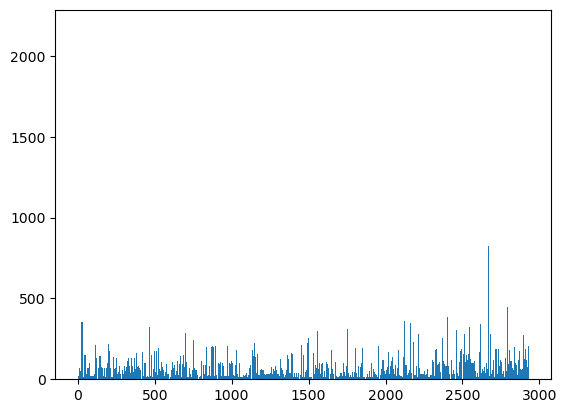

In [73]:
import matplotlib.pyplot as plt

plt.bar(x=[i for i in range(model_data.shape[0])],height=lst)

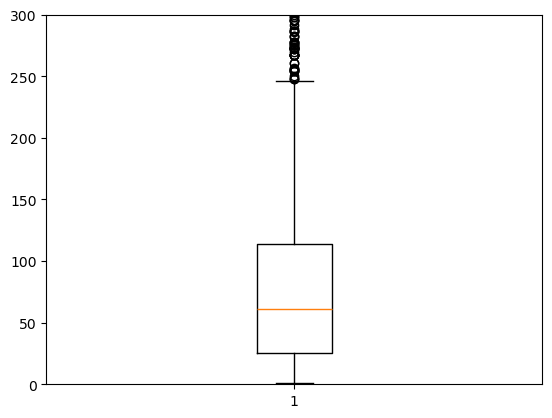

In [114]:
plt.boxplot(lst)
plt.ylim(0,300)
plt.show()

In [104]:
model_data['cleaned_side_effects'][0]

'(hives, difficult breathing, swelling in your face or throat) or   severe skin reaction (fever, sore throat, burning in your eyes, skin pain, red or purple skin rash that spreads and causes blistering and peeling).       doxycycline      '

In [118]:
model_data.to_csv('model_data.csv')

In [1]:
import pandas as pd
model_data=pd.read_csv("D:\Work\Projects\drug_recommender\src\Data\model_data.csv")

<>:2: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\W'
C:\Users\HP\AppData\Local\Temp\ipykernel_10524\3284382226.py:2: SyntaxWarning: invalid escape sequence '\W'
  model_data=pd.read_csv("D:\Work\Projects\drug_recommender\src\Data\model_data.csv")


In [2]:
import numpy as np 
model_data['cleaned_side_effects'] = model_data['cleaned_side_effects'].astype(str)

cleaned_values = model_data['cleaned_side_effects'].apply(lambda x: x.strip())

paragraph = " | ".join(cleaned_values)


In [3]:
with open('text.txt','w') as file: 
    file.write(paragraph)

In [5]:
from nltk.tokenize import word_tokenize
paragraph = word_tokenize(paragraph)

In [3]:
drugs_name=[]
for i in model_data['drug_name']:
    drugs_name.append(str(i).lower())

In [4]:
from nltk.corpus import stopwords
stopword=stopwords.words('english')
stopword=stopword + drugs_name # made stopwords and name to be remove


In [5]:
stopword=stopword + ['(','hive',';',',',')','.','hives']

In [ ]:
# stemming and stopwords
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
filtered_words = [word for word in paragraph if word not in stopword]
result=' '.join(filtered_words)
result

'h v e   f f c u l   b r e h n g   w e l l n g   n   u r   f c e   r   h r   r       e v e r e   k n   r e c n   f e v e r   r e   h r   b u r n n g   n   u r   e e   k n   p n   r e   r   p u r p l e   k n   r h   h   p r e   n   c u e   b l e r n g   n   p e e l n g               x c c l n e   |   h v e     f f c u l   b r e h n g   w e l l n g   f   u r   f c e   l p   n g u e   r   h r           b r e   w e l l n g   r   e n e r n e   |   k n   r h   f e v e r   w l l e n   g l n   f l u   l k e   p   u c l e   c h e   e v e r e   w e k n e   u n u u l   b r u n g   r   e l l w n g   f   u r   k n   r   e e   h     b e   r e   l k e l   w h   l n g   e r   u e   f   n c c l n e   n   h e   r e c n     c c u r   e v e r l   w e e k   f e r   u   b e g n   u n g   h   e c n e           n u b n e     n g l n g   b u r n n g   p n   h r   l     c l r n   f   u   k n   r   n l   z z n e   p n n n g   e n n   u c l e   r   j n   p n   n u e   r r h e   l   f   p p e e   w l l e n   n g u

In [12]:
import pickle
with open("stemmer.pkl",'wb') as file: 
    pickle.dump(stemmer,file)

In [ ]:
result = result.split(' | ')
result

In [11]:
len(result)

2943

In [13]:
model_data.shape[0]

2931

In [12]:
processed=pd.DataFrame(result,columns=['processed effect'])
model_data_0=pd.concat([model_data,processed],axis=1)

In [24]:
model_data_0=model_data_0.drop(['cleaned_side_effects'],axis=1)

In [15]:
model_data_0=model_data_0.dropna(axis=0)

In [25]:
model_data_0.to_csv('cleaned_training_data.csv')

In [6]:
model_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            2931 non-null   int64 
 1   drug_name             2931 non-null   object
 2   side_effects          2931 non-null   object
 3   cleaned_side_effects  2931 non-null   object
dtypes: int64(1), object(3)
memory usage: 91.7+ KB


In [2]:
import pandas as pd 
import numpy as np 

In [40]:

filtered_words = [word for word in paragraph if word not in stopword]
result=' '.join(filtered_words)
result

"difficult breathing swelling face throat severe skin reaction fever sore throat burning eyes skin pain red purple skin rash spreads causes blistering peeling | difficulty breathing swelling face lips tongue throat breast swelling tenderness | skin rash fever swollen glands flu like symptoms muscle aches severe weakness unusual bruising yellowing skin eyes may likely long term use reaction may occur several weeks began using medicine numbness tingling burning pain hair loss discoloration skin nails dizziness spinning sensation muscle joint pain nausea diarrhea loss appetite swollen tongue cough trouble swallowing rash itching headache | problems vision hearing muscle joint pain bone pain back pain increased thirst increased urination hallucinations see hearing things real symptoms depression - unusual mood changes crying spells feelings low self worth loss interest things enjoyed new sleep problems thoughts hurting signs liver pancreas problems - loss appetite upper stomach pain may sp

In [41]:
lst=result.split(' | ')

In [80]:
processed=pd.DataFrame(lst,columns=['to_be_split'])
df=pd.concat([model_data,processed],axis=1)

In [81]:
df['to_be_split'][0]

'difficult breathing swelling face throat severe skin reaction fever sore throat burning eyes skin pain red purple skin rash spreads causes blistering peeling'

In [82]:
df['to_be_split'].str.len().describe()


count    2943.000000
mean      277.899083
std       176.438646
min         3.000000
25%       112.000000
50%       270.000000
75%       500.000000
max       500.000000
Name: to_be_split, dtype: float64

In [ ]:
def reduce_effects(text, max_words=200):
    words = text.split()
    return ' '.join(words[:max_words])



In [70]:
lst=[]
for i in df['to_be_split']:
    words=i.split()
    words=' '.join(words)[:500]
    lst.append(words)

In [76]:
temp=pd.DataFrame(lst,columns=['reduced'])

In [79]:
df=pd.concat([df,temp],axis=1,ignore_index=True)
df.head()

,0,1,2,3,4,5,6
0,0.0,doxycycline,"(hives, difficult breathing, swelling in your ...","(hives, difficult breathing, swelling in your ...",difficult breathing swelling face throat sever...,NaN,difficult breathing swelling face throat sever...
1,1.0,spironolactone,hives ; difficulty breathing; swelling of your...,hives ; difficulty breathing; swelling of your...,difficulty breathing swelling face lips tongue...,NaN,difficulty breathing swelling face lips tongue...
2,2.0,minocycline,"skin rash, fever, swollen glands, flu-like sym...","skin rash, fever, swollen glands, flu like sym...",skin rash fever swollen glands flu like sympto...,NaN,skin rash fever swollen glands flu like sympto...
3,3.0,Accutane,problems with your vision or hearing; muscle o...,problems with your vision or hearing; muscle o...,problems vision hearing muscle joint pain bone...,NaN,problems vision hearing muscle joint pain bone...
4,4.0,clindamycin,hives ; difficult breathing; swelling of your ...,hives ; difficult breathing; swelling of your ...,difficult breathing swelling face lips tongue ...,NaN,difficult breathing swelling face lips tongue ...


In [83]:
df.head()

,Unnamed: 0,drug_name,side_effects,cleaned_side_effects,to_be_split
0,0.0,doxycycline,"(hives, difficult breathing, swelling in your ...","(hives, difficult breathing, swelling in your ...",difficult breathing swelling face throat sever...
1,1.0,spironolactone,hives ; difficulty breathing; swelling of your...,hives ; difficulty breathing; swelling of your...,difficulty breathing swelling face lips tongue...
2,2.0,minocycline,"skin rash, fever, swollen glands, flu-like sym...","skin rash, fever, swollen glands, flu like sym...",skin rash fever swollen glands flu like sympto...
3,3.0,Accutane,problems with your vision or hearing; muscle o...,problems with your vision or hearing; muscle o...,problems vision hearing muscle joint pain bone...
4,4.0,clindamycin,hives ; difficult breathing; swelling of your ...,hives ; difficult breathing; swelling of your ...,difficult breathing swelling face lips tongue ...


In [90]:
df.drop(['side_effects','cleaned_side_effects'],axis=1,inplace=True)

In [ ]:
def split_symptoms(text, chunk_size=2, max_chunks=10):
    words = text.split()
    chunks = [' '.join(words[i:i+chunk_size]) for i in range(0, len(words), chunk_size)]
    # Pad with empty strings if fewer than max_chunks
    chunks = chunks[:max_chunks] + [-1] * (max_chunks - len(chunks))
    return pd.Series(chunks, index=[f"symptom{i+1}" for i in range(max_chunks)])

In [94]:
df_split = df['to_be_split'].apply(lambda x: split_symptoms(x, chunk_size=2, max_chunks=15))

In [96]:
final_data_set=pd.concat([df,df_split],axis=1)

In [98]:
final_data_set.to_csv('final_set.csv')

In [3]:
import pickle 

In [4]:
pickle.load('D:\Work\Projects\drug_recommender\final_models\label_enc.pkl')

<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\HP\AppData\Local\Temp\ipykernel_19380\2512266563.py:1: SyntaxWarning: invalid escape sequence '\W'
  pickle.load('D:\Work\Projects\drug_recommender\final_models\label_enc.pkl')


TypeError: file must have 'read' and 'readline' attributes